In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dj38.tsp', sep=" ", skiprows=10, header=None)
df=df.drop(df.columns[[0]], axis = 1)
df.columns=list(['x','y'])
df_ = np.asarray(df)
df

,x,y
0,11003.6111,42102.5000
1,11108.6111,42373.8889
2,11133.3333,42885.8333
3,11155.8333,42712.5000
4,11183.3333,42933.3333
5,11297.5000,42853.3333
6,11310.2778,42929.4444
7,11416.6667,42983.3333
8,11423.8889,43000.2778
9,11438.3333,42057.2222


In [3]:
# calculate the distance 
def distance(route):
    distance=0
    for i in range(len(route)-1):
        p=df_[route[i+1]]-df_[route[i]]
        dis=math.hypot(p[0],p[1])
        distance=distance+dis
    p=df_[route[-1]]-df_[route[0]]
    # distance between last and fist city
    distance=distance+math.hypot(p[0],p[1])
    return distance

In [4]:
# plot the route
def plot_route(route_best):
    df_route=df.iloc[route_best]
    df_route.loc['origin'] =df_route.iloc[0]
    cities_route = np.asarray(df_route)

    plt.scatter(df_[:,0],df_[:,1])
    plt.plot(cities_route[:,0],cities_route[:,1])
    plt.show()
    print("Route: " + str(route_best) + "\n\nDistance_scaled: "+ str(distance(route_best)) )

In [5]:
def MCMC_SA(T,T_min,cooling_rate,iteration):

    time_start=datetime.datetime.now()
    print("start:",time_start)

    route=np.random.choice(df.shape[0],df.shape[0],replace=False)
    #seq=np.arange(df.shape[0]) #initial sequence [0,1,2,3......19]

    distance_min_distribution=[] # record solution 

    while T>T_min:
        for i in range(iteration):
            dis=distance(route)
            distance_min_distribution.append(dis)
            
            # generate new sequence
            route_new = copy.copy(route)
        
            #switch two successive points
            a = np.random.randint(0, df.shape[0] - 1)
            route_new[[a, (a + 1)%df.shape[0]]] = route_new[[(a + 1)%df.shape[0], a]] 
        
            #switch two random points
            #a = random.randint(0, 19)
            #b = random.randint(0, 19)
            #route_new[a], route_new[b] = route_new[b], route_new[a]      
        
            dis_new=distance(route_new)
            # compare new and old sequence
            delta=dis_new-dis
            # Metropolis 
            if delta<0:
                # accept new solution
                route=route_new           
            else:
                # the worse new seq could still be accepted 
                if np.random.uniform(0, 1) < np.exp(-delta/T):
                    route=route_new
        T = T * cooling_rate
        print(T)

    time_end=datetime.datetime.now()
    duration=time_end-time_start
    print("end:",time_end)
    print("duration:",duration)
    
    return route,distance_min_distribution,duration   

In [6]:
T = 1000   #initial temperature
T_min=0.1 #lowest temperature
cooling_rate=0.98 #cooling rate
iteration=5000
route_best,distance_min_distribution,duration=MCMC_SA(T,T_min,cooling_rate,iteration)

start: 2022-01-02 18:58:01.716215
980.0
960.4
941.192
922.36816
903.9207968
885.8423808639999
868.1255332467199
850.7630225817854
833.7477621301497
817.0728068875467
800.7313507497958
784.7167237347999
769.0223892601039
753.6419414749017
738.5691026454036
723.7977205924956
709.3217661806457
695.1353308570327
681.2326242398921
667.6079717550942
654.2558123199923
641.1706960735925
628.3472821521206
615.7803365090781
603.4647297788965
591.3954351833186
579.5675264796522
567.9761759500592
556.616652431058
545.4843193824369
534.5746329947881
523.8831403348923
513.4054775281945
503.1373679776306
493.074620618078
483.21312820571643
473.5488656416021
464.07788832877003
454.7963305621946
445.7004039509507
436.7863958719317
428.05066795449306
419.4896545954032
411.0998615034951
402.8778642734252
394.82030698795666
386.9239008481975
379.18542283123355
371.6017143746089
364.1696800871167
356.8862864853744
349.7485607556669
342.75358954055355
335.8985177497425
329.18054739474763
322.5969364468527
3

0.12716793159079126
0.12462457295897543
0.12213208149979592
0.11968943986979999
0.11729565107240399
0.1149497380509559
0.11265074328993678
0.11039772842413804
0.10818977385565529
0.10602597837854218
0.10390545881097134
0.10182734963475192
0.09979080264205688
end: 2022-01-02 19:04:37.417616
duration: 0:06:35.701401


Text(0, 0.5, 'distance')

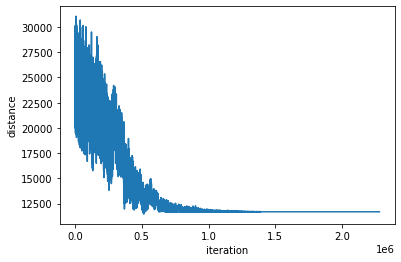

In [7]:
dis_shortest,=plt.plot(distance_min_distribution)
plt.xlabel("iteration")
plt.ylabel("distance")

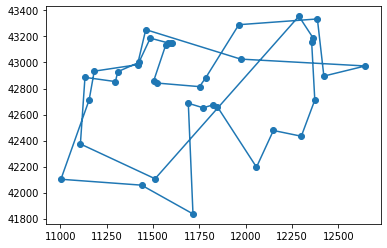

Route: [37 27 10  7  4  3  0  9 20 19 22 24 25 28 29 31 34 32 33 30 13  1  2  5
  6  8 11 16 18 17 15 12 14 21 23 26 35 36]

Distance_scaled: 11687.806739528143


In [8]:
plot_route(route_best)